# Capstone Project. **Real Estate Valuation PCA**  
#### **Angela Brito**
#### Bachelor in Data and Business Analytics


Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
enriched_data = pd.read_csv('/content/drive/MyDrive/TFG/Dataset/TFG_finaldata.csv')

In [5]:
print(enriched_data.head(5))

   Unnamed: 0    price  baths  rooms  sqft  \
0           0  1920000      3      3   183   
1           1  1995000      3      3   170   
2           2  1300000      3      4   270   
3           3  1650000      3      3   248   
4           4  1590750      3      3   116   

                                         description             address  \
0  residencia única con acabados de la más alta c...   Recoletos, Madrid   
1  preciosa reforma a estrenar, con terrazas y ga...  Castellana, Madrid   
2  de salas consultores inmobiliarios mav02679 le...   Hortaleza, Madrid   
3  gilmar real estate vende espectacular piso en ...   Chamartín, Madrid   
4  descubre esta impresionante vivienda exterior ...   Recoletos, Madrid   

  typology  Terrace  Garage  ...  \
0    Pisos    False   False  ...   
1    Pisos     True    True  ...   
2    Pisos     True    True  ...   
3    Pisos     True    True  ...   
4    Pisos    False    True  ...   

   Formación profesional 2º grado, Bachiller Supe

In [6]:
print(enriched_data.dtypes[0])

int64


In [7]:
enriched_data.columns

Index(['Unnamed: 0', 'price', 'baths', 'rooms', 'sqft', 'description',
       'address', 'typology', 'Terrace', 'Garage', 'Pool', 'Garden',
       'Exterior', 'RecentlyRenovated', 'HighFloor', 'NaturalLight', 'Views',
       'ClimateControl', 'EnergyEfficient', 'Security', 'Accessible',
       'SouthFacing', 'EastFacing', 'NorthFacing', 'WestFacing', 'NearSchool',
       'NearAmenities', 'NearMetro', 'NearLandmark', 'District',
       'price_per_sqft', 'Surface', 'Density', 'Population Median Age',
       'People with Spanish Nationality', 'People with Foreign Nationality',
       'Households', 'Median House Size', 'Demographic Growth Rate',
       'Median Income', 'Median Unemployment Rate', 'Median House Age',
       'Education Level', 'Primaria incompleta',
       'Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado',
       'Formación profesional 2º grado, Bachiller Superior o BUP',
       'Titulaciones medias, diplomatura, arquitectura o ingeniería técnica',

In [8]:
enriched_data = enriched_data.drop(columns = 'Unnamed: 0', errors='ignore')

In [9]:
enriched_data['price_log'] = np.log(enriched_data['price'] + 1)

In [10]:
enriched_data = enriched_data.drop(['price', 'price_per_sqft'], axis=1)

In [11]:

binary_columns = [
    'Terrace', 'Garage', 'Pool', 'Garden', 'Exterior', 'RecentlyRenovated',
    'HighFloor', 'NaturalLight', 'Views', 'ClimateControl', 'EnergyEfficient',
    'Security', 'Accessible', 'SouthFacing', 'EastFacing', 'NorthFacing',
    'WestFacing', 'NearSchool', 'NearAmenities', 'NearMetro', 'NearLandmark'
]

yes_no_mapping = {'Yes': 1, 'No': 0, 'True': 1, 'False': 0}


enriched_data[binary_columns] = enriched_data[binary_columns].replace(yes_no_mapping).apply(pd.to_numeric)

print(enriched_data[binary_columns].dtypes)


Terrace              bool
Garage               bool
Pool                 bool
Garden               bool
Exterior             bool
RecentlyRenovated    bool
HighFloor            bool
NaturalLight         bool
Views                bool
ClimateControl       bool
EnergyEfficient      bool
Security             bool
Accessible           bool
SouthFacing          bool
EastFacing           bool
NorthFacing          bool
WestFacing           bool
NearSchool           bool
NearAmenities        bool
NearMetro            bool
NearLandmark         bool
dtype: object


In [12]:
enriched_data[binary_columns] = enriched_data[binary_columns].astype(int)


print(enriched_data[binary_columns].dtypes)


Terrace              int64
Garage               int64
Pool                 int64
Garden               int64
Exterior             int64
RecentlyRenovated    int64
HighFloor            int64
NaturalLight         int64
Views                int64
ClimateControl       int64
EnergyEfficient      int64
Security             int64
Accessible           int64
SouthFacing          int64
EastFacing           int64
NorthFacing          int64
WestFacing           int64
NearSchool           int64
NearAmenities        int64
NearMetro            int64
NearLandmark         int64
dtype: object


In [13]:
numeric_columns =[]
for column in enriched_data.select_dtypes(include=['float', 'int64']).columns:
  if column != 'id' and column != 'Unnamed: 0':
    numeric_columns.append(column)

In [14]:
numeric_columns

['baths',
 'rooms',
 'sqft',
 'Terrace',
 'Garage',
 'Pool',
 'Garden',
 'Exterior',
 'RecentlyRenovated',
 'HighFloor',
 'NaturalLight',
 'Views',
 'ClimateControl',
 'EnergyEfficient',
 'Security',
 'Accessible',
 'SouthFacing',
 'EastFacing',
 'NorthFacing',
 'WestFacing',
 'NearSchool',
 'NearAmenities',
 'NearMetro',
 'NearLandmark',
 'Surface',
 'Density',
 'Population Median Age',
 'People with Spanish Nationality',
 'People with Foreign Nationality',
 'Households',
 'Median House Size',
 'Demographic Growth Rate',
 'Median Income',
 'Median Unemployment Rate',
 'Median House Age',
 'Education Level',
 'Primaria incompleta',
 'Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado',
 'Formación profesional 2º grado, Bachiller Superior o BUP',
 'Titulaciones medias, diplomatura, arquitectura o ingeniería técnica',
 'Estudios superiores, licenciatura, arquitectura superior, estudios superiores no universitarios, docturado, estudios de posgrado',
 'Nivel de estu

**First, we have to hot encode our features so that we can remove the non_numeric columns**

In [15]:
import pandas as pd
import numpy as np

non_numeric_columns = enriched_data.select_dtypes(exclude=[np.number]).columns.tolist()

print(non_numeric_columns)


['description', 'address', 'typology', 'District']


In [16]:
district_dummies = pd.get_dummies(enriched_data['District'], prefix='District')

In [17]:
district_dummies

,District_Arganzuela,District_Barajas,District_Carabanchel,District_Centro,District_Chamartin,District_Chamberi,District_Ciudad Lineal,District_Fuencarral El Pardo,District_Hortaleza,District_Latina,...,District_Moratalaz,District_Puente De Vallecas,District_Retiro,District_Salamanca,District_San Blas Canillejas,District_Tetuan,District_Usera,District_Vicalvaro,District_Villa De Vallecas,District_Villaverde
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
909,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
911,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data_with_dummies = pd.concat([enriched_data.drop('District', axis=1), district_dummies], axis=1)

In [19]:
for column in data_with_dummies.columns:
    if data_with_dummies[column].dtype == 'bool':
        data_with_dummies[column] = data_with_dummies[column].astype(int)


In [20]:
data_with_dummies.head()

,baths,rooms,sqft,description,address,typology,Terrace,Garage,Pool,Garden,...,District_Moratalaz,District_Puente De Vallecas,District_Retiro,District_Salamanca,District_San Blas Canillejas,District_Tetuan,District_Usera,District_Vicalvaro,District_Villa De Vallecas,District_Villaverde
0,3,3,183,residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,3,170,"preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,4,270,de salas consultores inmobiliarios mav02679 le...,"Hortaleza, Madrid",Pisos,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,248,gilmar real estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,3,116,descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
non_numeric_columns = data_with_dummies.select_dtypes(exclude=[np.number]).columns.tolist()
target_column = 'price_log'
non_numeric_columns_except_target = [col for col in non_numeric_columns if col != target_column]

d_model = data_with_dummies.drop(non_numeric_columns_except_target, axis=1)


In [22]:
non_numeric_columns = enriched_data.select_dtypes(exclude=[np.number]).columns.tolist()
target_column = 'price_log'
non_numeric_columns_except_target = [col for col in non_numeric_columns if col != target_column]

d_model = enriched_data.drop(non_numeric_columns_except_target, axis=1)


## PCA

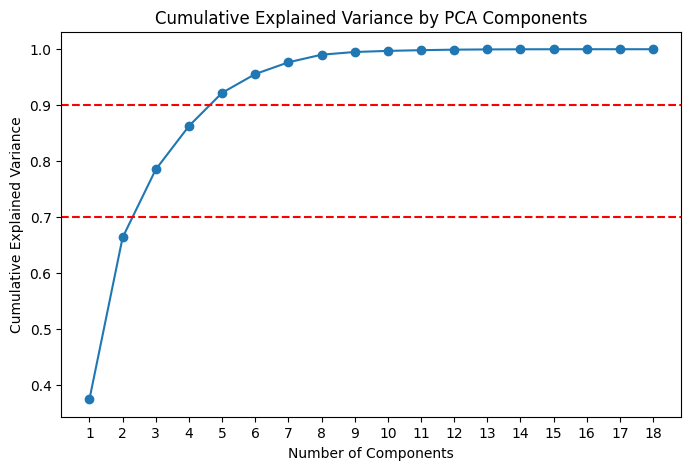

In [23]:
features = [
 'Surface',
 'Density',
 'Population Median Age',
 'People with Spanish Nationality',
 'People with Foreign Nationality',
 'Households',
 'Median House Size',
 'Demographic Growth Rate',
 'Median Income',
 'Median Unemployment Rate',
 'Median House Age',
 'Education Level',
 'Primaria incompleta',
 'Average House Size',
 'Number of Houses',
 'Number of Concertado Schools',
 'Number of Private Schools',
 'Number of Public Schools']

X = enriched_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))

plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.70, color='r', linestyle='--')
plt.show()


In [24]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, index=features, columns=[f'Component {i+1}' for i in range(4)])

loading_matrix


,Component 1,Component 2,Component 3,Component 4
Surface,-0.041735,0.564655,-0.280823,-0.468170
Density,0.337095,-0.865024,-0.183852,0.150894
Population Median Age,-0.441557,-0.668014,-0.323111,0.270659
People with Spanish Nationality,-0.865455,0.267564,-0.216282,0.097157
People with Foreign Nationality,0.830237,-0.364712,0.236726,-0.152090
Households,0.558619,0.330214,-0.690601,-0.268904
Median House Size,-0.464329,0.823387,-0.131992,0.228341
Demographic Growth Rate,-0.392604,0.414586,-0.058207,-0.312495
Median Income,-0.945963,-0.140020,-0.141238,-0.150466
Median Unemployment Rate,0.751102,0.556680,-0.275926,0.110282


In [25]:
PCA1 = []
PCA2 = []
PCA3 = []
PCA4 = []
for x in X_pca:
  PCA1.append(x[0])
  PCA2.append(x[1])
  PCA3.append(x[2])
  PCA4.append(x[3])

In [27]:
pcaDF = pd.DataFrame({
    "PCA1": PCA1,
    "PCA2": PCA2,
    "PCA3": PCA3,
    "PCA4": PCA4
})

## Concatenate PCA with Other Features

In [28]:

features = [
 'Surface',
 'Density',
 'Population Median Age',
 'People with Spanish Nationality',
 'People with Foreign Nationality',
 'Households',
 'Median House Size',
 'Demographic Growth Rate',
 'Median Income',
 'Median Unemployment Rate',
 'Median House Age',
 'Education Level',
 'Primaria incompleta',
 'Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado',
 'Formación profesional 2º grado, Bachiller Superior o BUP',
 'Titulaciones medias, diplomatura, arquitectura o ingeniería técnica',
 'Estudios superiores, licenciatura, arquitectura superior, estudios superiores no universitarios, docturado, estudios de posgrado',
 'Nivel de estudios desconocido y no consta',
 'Average House Size',
 'Number of Houses',
 'Cadastral Value of Properties',
 'Number of Concertado Schools',
 'Number of Private Schools',
 'Number of Public Schools']

d_model = d_model.drop(features, axis=1)

In [29]:
import pandas as pd

final_df = pd.concat([d_model.reset_index(drop=True), pcaDF.reset_index(drop=True)], axis=1)


In [30]:
final_df.head()


,baths,rooms,sqft,Terrace,Garage,Pool,Garden,Exterior,RecentlyRenovated,HighFloor,...,WestFacing,NearSchool,NearAmenities,NearMetro,NearLandmark,price_log,PCA1,PCA2,PCA3,PCA4
0,3,3,183,0,0,0,0,0,0,0,...,0,0,0,0,1,14.467836,-1.232201,-2.256907,-1.177042,-0.027694
1,3,3,170,1,1,0,0,0,0,0,...,0,0,0,1,0,14.506155,-1.232201,-2.256907,-1.177042,-0.027694
2,3,4,270,1,1,1,0,0,0,0,...,0,0,0,0,0,14.077876,-0.981535,3.842446,0.007682,-0.556615
3,3,3,248,1,1,0,1,0,0,0,...,0,0,0,1,0,14.316286,-2.863685,-0.511720,-0.086387,0.110276
4,3,3,116,0,1,0,0,1,0,0,...,0,0,0,0,0,14.279717,-1.232201,-2.256907,-1.177042,-0.027694


Export dataset

In [31]:
final_df.to_csv("TFG_finaldata5.csv")